In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [2]:
# Step 1: Data Exploration
# Load the dataset
train_data = pd.read_csv("E:\Logistic Regression\Logistic Regression\Titanic_train.csv")
test_data = pd.read_csv("E:\Logistic Regression\Logistic Regression\Titanic_test.csv")

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# Basic data exploration
print(train_data.head())
print(train_data.info())
print(train_data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [6]:
# Step 2: Data Preprocessing
# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [7]:
# Encode categorical variables
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])
test_data['Embarked'] = label_encoder.fit_transform(test_data['Embarked'])

In [8]:
# Step 3: Model Building
# Select features and target
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_data['Survived']


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Step 4: Model Evaluation
# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


In [13]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

In [14]:
# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Accuracy: 0.80
Precision: 0.78
Recall: 0.73
F1 Score: 0.76
ROC AUC Score: 0.88


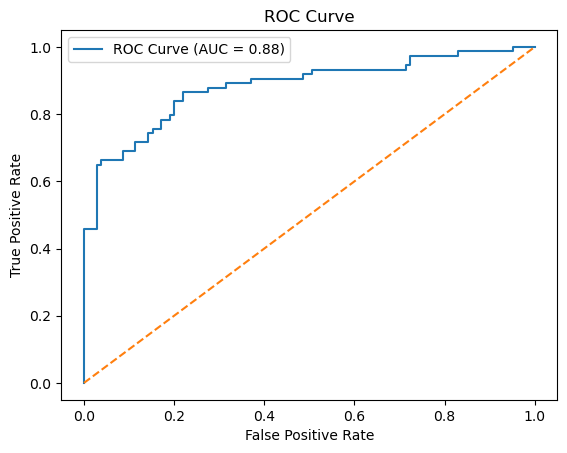

In [15]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [16]:
# Step 5: Interpretation
# Interpret model coefficients
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients)

          Coefficient
Pclass      -0.781927
Sex         -1.278705
Age         -0.395303
SibSp       -0.349105
Parch       -0.098565
Fare         0.126362
Embarked    -0.170937


In [17]:
# Step 6: Deployment with Streamlit (Optional)
# Save the model
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [ ]:
# Create a Streamlit app
# Save this code in a file named `app.py`


In [18]:
"""
import streamlit as st
import joblib

# Load the trained model
model = joblib.load('logistic_regression_model.pkl')

# Title of the Streamlit app
st.title('Titanic Survival Prediction')

# User inputs
pclass = st.selectbox('Passenger Class', [1, 2, 3])
sex = st.selectbox('Sex', ['male', 'female'])
age = st.slider('Age', 0, 100, 25)
sibsp = st.number_input('Number of Siblings/Spouses Aboard', 0, 10, 0)
parch = st.number_input('Number of Parents/Children Aboard', 0, 10, 0)
fare = st.slider('Fare', 0.0, 500.0, 30.0)
embarked = st.selectbox('Port of Embarkation', ['C', 'Q', 'S'])

# Convert user inputs into a format suitable for prediction
inputs = pd.DataFrame([[pclass, sex, age, sibsp, parch, fare, embarked]], 
                      columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

# Perform prediction
prediction = model.predict(inputs)[0]

# Display the prediction result
if prediction == 1:
    st.write('The passenger is likely to survive.')
else:
    st.write('The passenger is unlikely to survive.')
"""

# Deploy the Streamlit app using Streamlit Community Cloud or locally

"\nimport streamlit as st\nimport joblib\n\n# Load the trained model\nmodel = joblib.load('logistic_regression_model.pkl')\n\n# Title of the Streamlit app\nst.title('Titanic Survival Prediction')\n\n# User inputs\npclass = st.selectbox('Passenger Class', [1, 2, 3])\nsex = st.selectbox('Sex', ['male', 'female'])\nage = st.slider('Age', 0, 100, 25)\nsibsp = st.number_input('Number of Siblings/Spouses Aboard', 0, 10, 0)\nparch = st.number_input('Number of Parents/Children Aboard', 0, 10, 0)\nfare = st.slider('Fare', 0.0, 500.0, 30.0)\nembarked = st.selectbox('Port of Embarkation', ['C', 'Q', 'S'])\n\n# Convert user inputs into a format suitable for prediction\ninputs = pd.DataFrame([[pclass, sex, age, sibsp, parch, fare, embarked]], \n                      columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])\n\n# Perform prediction\nprediction = model.predict(inputs)[0]\n\n# Display the prediction result\nif prediction == 1:\n    st.write('The passenger is likely to sur